# Heavy Traffic Indicators for I-94
## I-94

Interstate 94 (I-94) is a east-west interstate highway that connects the Great Lakes with the Great Plains. Additionally it is the only east-west highway that directly connects with Canada.

![](https://www.google.com/maps/vt/data=QgfFfHXqNNEl9B4PI2UY988qjqSzLtY8sBRFDwh867YvU8pwB42hE4yUPXmjvlcteznsrEPsCMWhD1Tn4HPECI5DQBPRKajDdJcKEmx_wGq9yuM6lud_XF4YaAZEzRI3TvLk_b2KbyJk9-bm1dIPXliJ9VSq4ksHIw8DoTMEXl4MmjMciW99LrPhKeOb3pPw6N_P6MWF93fHoD_soXmE1-E21sAJRxk_e15qIJFn7B7T826Y6oLmTlnb4HmZc2sacRbqW3wzgXy6idQD)

## Project Overview

Our goal is to analyze the data provided to find potential indicators for traffic heavy traffic. The data collected is only for a small portion of I-94 (between Minneapolis and St. Paul) and therefore **this data can not be applicable to the entirety of I-94.**

The data was collected by *John Hogue* and is avaliable for download on the  [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). Note: This data only tracks vehicles moving West, not East.

#### Data Dictionary:

- `holiday`: US National holidays plus regional holidays
- `temp`: Average temperature in kelvin
- `rain_1h`: Amount of rain that occured in that hour in millimetres
- `snow_1h`: Amount of snow that occured in that hour in millimetres
- `clouds_all`: Percentage of cloud coverage
- `weather_main`: Short textual description of the current weather
- `weather_description`: Long textual description of the current weather
- `date_tinme`: Time of data collection in local CST time
- `traffic_volume`: Hourly I-94 ATR 301 reported westbound traffic volume

Before we start analyzing the data lets import some libraries that will help us.

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploring Data

In [2]:
#read csv file into Jupyter as a dataframe
traffic=pd.read_csv(r'C:\Users\david\Desktop\Work Data\Unpackaged\Heavy Traffic Indicators I-94.csv')

traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


There are 48,204 rows and 9 columns. There is no missing data. Additionally, we have object, float and integer dtypes.

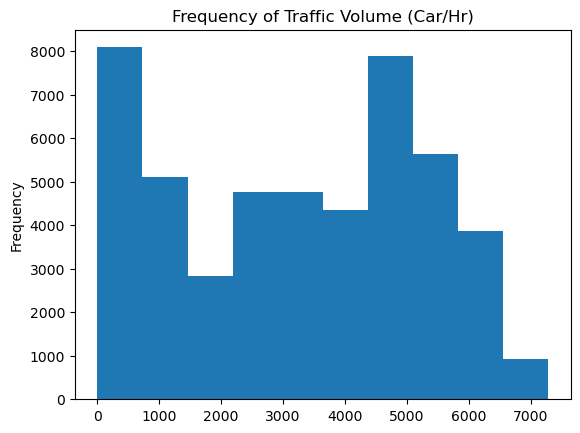

Additional Information:
 count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


In [5]:
#plot a histogram for traffic_volume column
traffic['traffic_volume'].plot.hist()
plt.title('Frequency of Traffic Volume (Car/Hr)')
plt.show()

#additional statistics
print('Additional Information:\n', traffic['traffic_volume'].describe())

We can see that 25% of the time we have 1,193 vehicles going westbound per hour, where 75% of the time we have 4,933 vehicles going westbound. So we can definitely see that some variable(s) influence people to drive at a certain time than opposed to another time. The most obvious factor that comes to mind is the cycle of the day; wether it's day or night outside.

<br>       Lets split the data into night time and day time sets for the `date_time` column.

## Traffic Volume: Day vs. Night

In [6]:
#convert date_time column to datetime type
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

#create daytime and nighttime dataframes from date_time column
daytime_traffic = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(daytime_traffic.shape)

nighttime_traffic = traffic[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(nighttime_traffic.shape)

(23877, 9)
(24327, 9)


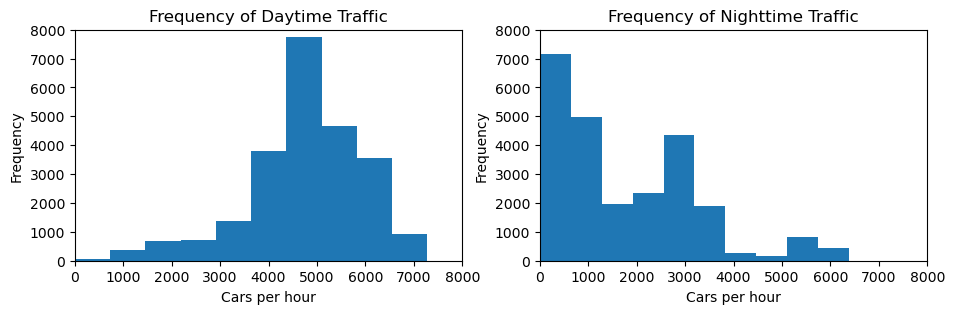

Daytime Statistics:
 count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64 

Nighttime Statistics:
 count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


In [7]:
plt.figure(figsize=(11,3))

#subplot for daytime data
plt.subplot(1,2,1)
plt.hist(daytime_traffic['traffic_volume'])
plt.ylim(0,8000)
plt.xlim(0,8000)
plt.xlabel('Cars per hour')
plt.ylabel('Frequency')
plt.title('Frequency of Daytime Traffic')

plt.subplot(1,2,2)
plt.hist(nighttime_traffic['traffic_volume'])
plt.ylim(0,8000)
plt.xlim(0,8000)
plt.xlabel('Cars per hour')
plt.ylabel('Frequency')
plt.title('Frequency of Nighttime Traffic')

plt.show()

#additional statistics 
print('Daytime Statistics:\n', daytime_traffic['traffic_volume'].describe(), '\n')
print('Nighttime Statistics:\n', nighttime_traffic['traffic_volume'].describe())

The daytime traffic histogram is skewed to the left while the opposite is true for the nighttime histogram. Furthermore we can see that **on average there are 4,762 cars per hour for daytime drivers and 1,785 cars per hour for nighttime drivers.**
<br>

Since we are looking for heavy traffic indicators we are going to only look at the daytime data moving forward.

## Time Indicators

One of the possible indicators of heavy traffice is time. Now we will look for patterns of heavy traffic in certain months, days and the time of the day. Let's use line graphs to plot the traffic volume per time unit.

In [8]:
#sort daytime traffic by month
daytime_traffic['month'] = daytime_traffic['date_time'].dt.month

#EXPLAIN CODE BELOW
by_month = daytime_traffic.groupby('month').mean()
by_month['traffic_volume']

C:\Users\david\AppData\Local\Temp\ipykernel_10224\3020734708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_traffic['month'] = daytime_traffic['date_time'].dt.month


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

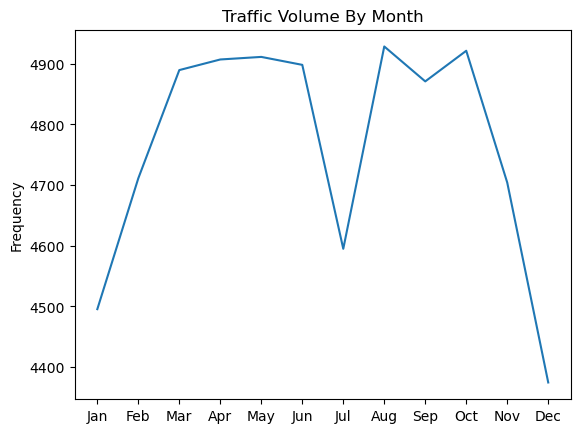

In [9]:
#create dataframe base off of the day of the week using datetime

plt.plot(by_month['traffic_volume'])
plt.title('Traffic Volume By Month')
plt.ylabel('Frequency')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12], 
           labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

Interestingly enough there seems to be higher volumes of traffic during warm months (March-October) with the exception of July. Let's investigate the traffic over the years specifically in july.

C:\Users\david\AppData\Local\Temp\ipykernel_10224\2270306702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_traffic['year'] = daytime_traffic['date_time'].dt.year


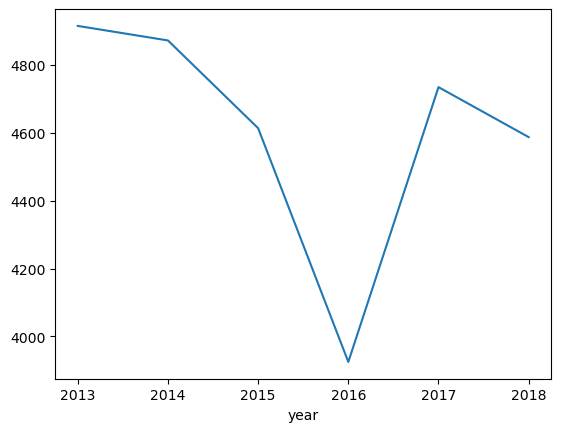

In [10]:
#create dataframe based off of the the year using datetime and graph it

daytime_traffic['year'] = daytime_traffic['date_time'].dt.year
only_july = daytime_traffic[daytime_traffic['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

The volume of traffic stayed relatively the same for July over the years with the exception of 2016. It's possible that a large construction project went on during that year which significantly decreased westbound traffic.

## Time Indicators (ll)

Let's now visualize what the average traffic volume looks like for each day of the week.

In [11]:
#create dataframe based off of the day of the week using datetime and graph it

daytime_traffic['dayofweek'] = daytime_traffic['date_time'].dt.dayofweek
by_dayofweek = daytime_traffic.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

C:\Users\david\AppData\Local\Temp\ipykernel_10224\3728987295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_traffic['dayofweek'] = daytime_traffic['date_time'].dt.dayofweek


dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

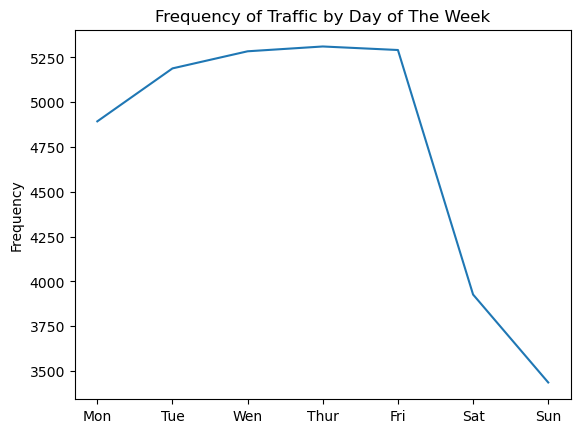

In [12]:
#plot traffic_volume column based off of dayofweek column

plt.plot(by_dayofweek['traffic_volume'])
plt.title('Frequency of Traffic by Day of The Week')
plt.ylabel('Frequency')
plt.xticks(ticks=[0,1,2,3,4,5,6],
           labels=['Mon','Tue','Wen','Thur','Fri','Sat','Sun'])
plt.show()

As expected we can see a significant decrease in traffic on the weekends. This would indicate that the a large portion of heavy traffic is due to the work week and people commuting to their jobs.

## Time Indicators (lll)

To analyze this further let's create two dataframes where traffic volume can be measured by weekday and weekend.

In [13]:
#create two aggregate functions of weekday and weekend times 

daytime_traffic['hour'] = daytime_traffic['date_time'].dt.hour
weekday = daytime_traffic.copy()[daytime_traffic['dayofweek'] <= 4] #4 == Friday
weekend = daytime_traffic.copy()[daytime_traffic['dayofweek'] >= 5] #5 == Saturday
by_hour_weekday = weekday.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

C:\Users\david\AppData\Local\Temp\ipykernel_10224\1453805040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime_traffic['hour'] = daytime_traffic['date_time'].dt.hour


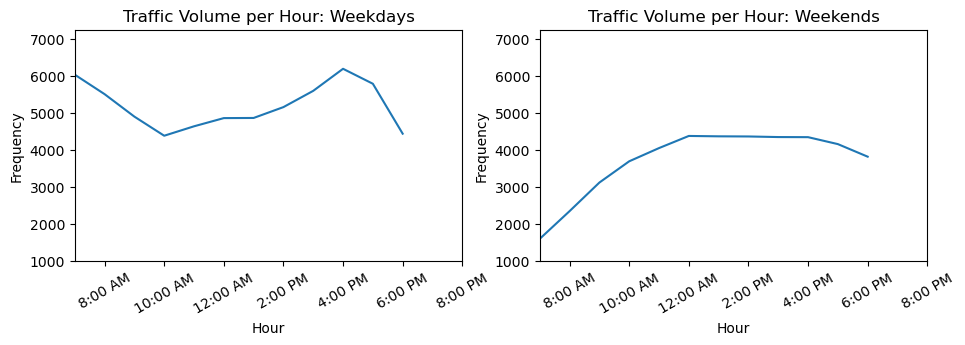

In [14]:
#plot two graphs, one for weekdays and one for weekends

plt.figure(figsize=(11,3))

plt.subplot(1,2,1)
plt.plot(by_hour_weekday['traffic_volume'])
plt.title('Traffic Volume per Hour: Weekdays')
plt.xticks(rotation=30,
           ticks=[8,10,12,14,16,18,20],
           labels=['8:00 AM','10:00 AM','12:00 AM','2:00 PM','4:00 PM','6:00 PM','8:00 PM'])
plt.xlim(7,20)
plt.ylim(1000,7250)
plt.xlabel('Hour')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Traffic Volume per Hour: Weekends')
plt.xticks(rotation=30,
           ticks=[8,10,12,14,16,18,20],
           labels=['8:00 AM','10:00 AM','12:00 AM','2:00 PM','4:00 PM','6:00 PM','8:00 PM'])
plt.xlim(7,20)
plt.ylim(1000,7250)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()

At every hour of the day there is a higher traffic volume during weekdays than weekends, with a noteable peek on the weekdays around rush hour -- as expected.


To summarize the time-related indicators:
- Traffic is usually heavier during warmer months (March-October) than colder months (November-February).
- Traffic is generally heavier on weekdays
- Rush hour is generally around 6 AM and 4 PM

## Weather Indicators

The next potential heavy traffic indicator I would like to look at is weather, as our dataset has ample information about weather.

In [15]:
daytime_traffic.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation (~0.13), compared to the other relevant columns (`rain_1h`, `snow_1h`, and `clouds_all`). Let's visualize this relationship with a scatterplot.

Text(0.5, 1.0, 'Traffic Volume with Temperature')

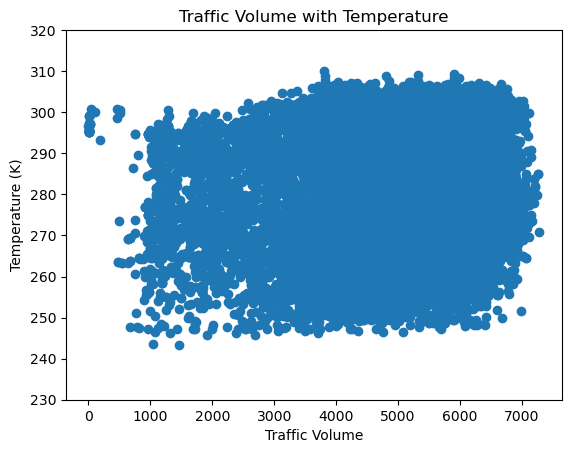

In [16]:
plt.scatter(daytime_traffic['traffic_volume'], daytime_traffic['temp'])
plt.ylim(230,320)
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature (K)')
plt.title('Traffic Volume with Temperature')

There doesn't seem to be any correlation between temperature and traffic volume. Let's move onto the columns `weather_main` and `weather_description`.

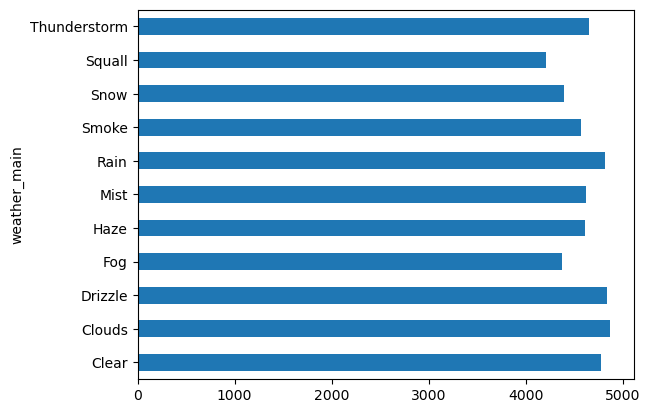

In [17]:
by_weather_main = daytime_traffic.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

There doesn't seem to be any indication between these weather events and a substantial change in traffic volume. Let's move onto `weather_description`.

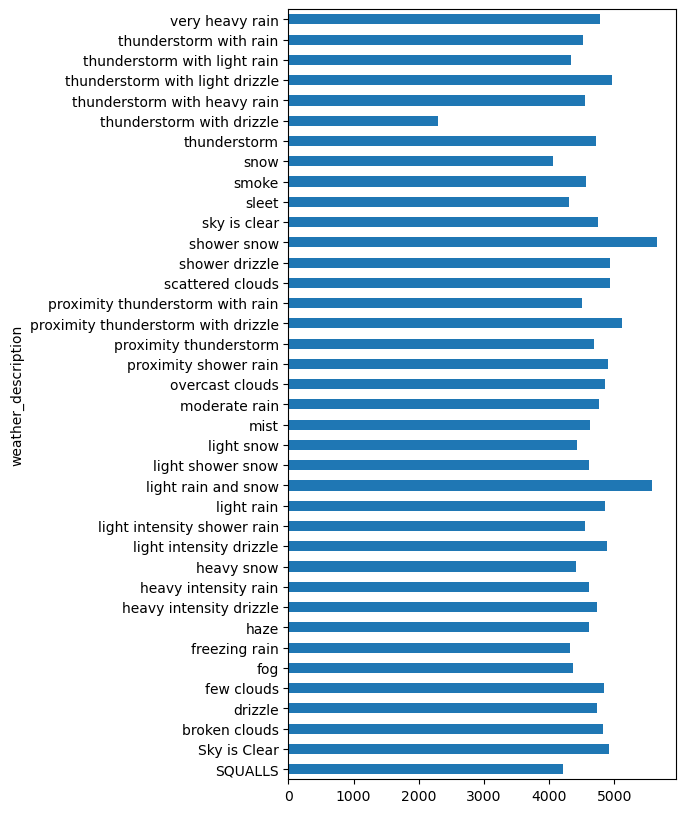

In [18]:
by_weather_description = daytime_traffic.groupby('weather_description').mean()

by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

The only two weatheer events where traffic exceeds 5,000 cars/hr is shower snow and light rain and snow. This does not make very much sense as both of those weather events aren't too great for road traffic. It is possible this could just be a result of the highway being built in the north and therefore having certain weather events more likely than others.

## Conclusion

We intitally found that traffic is generally higher during the day, then we explored traffic volume by month and also concluded that heavy traffic is more frequent during the warm months opposed to the cold months. Lastly, No conclusive evidence could be drawn from weather conditions correlating with heavy traffic when we analyzed it.

# THINGS TO DO

- Add comments
- Write summary
- Rewrite comments/add comments
- See if I can make the graphs better
- Look for story cohesion
- Hide warnings

https://nbviewer.org/urls/community.dataquest.io/uploads/short-url/vja3fndhAyZkszy7VomHM9mq8j6.ipynb
https://nbviewer.org/urls/community.dataquest.io/uploads/short-url/tltyhWw8YFYJSAycw24ZuK2csUj.ipynb
https://nbviewer.org/urls/community.dataquest.io/uploads/short-url/eLf5122NsL1ZCpDabcgqoUwrhkv.ipynb